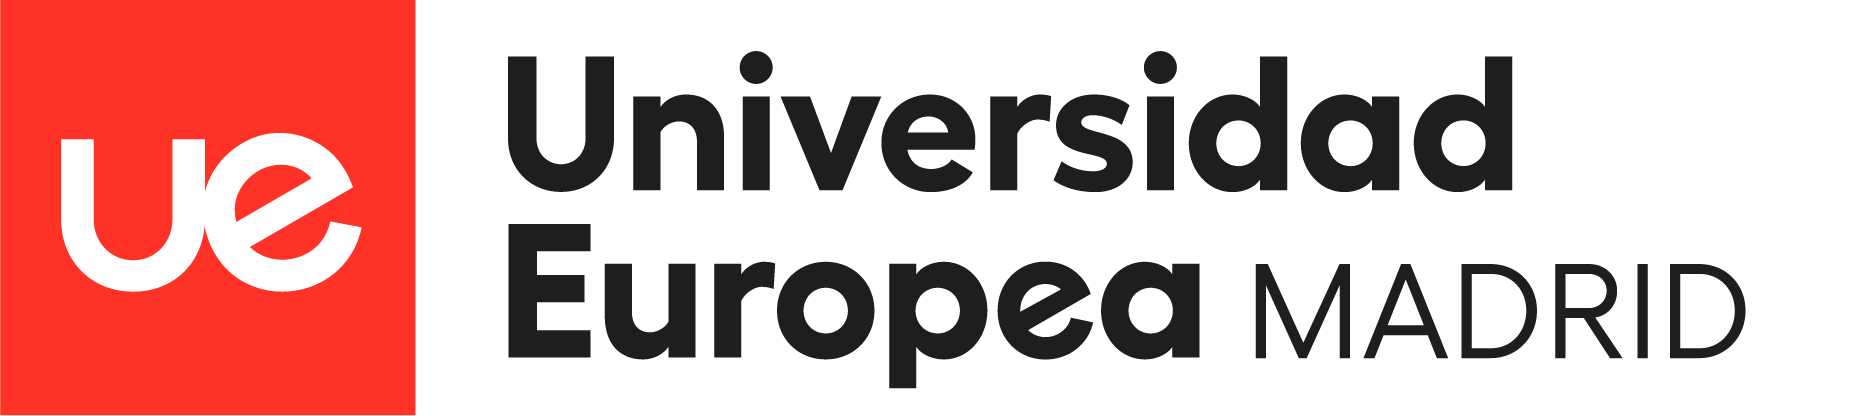

# Actividad 2: Python

La siguiente actividad debe ser realizada por todo el alumnado siguiendo las instrucciones de cada ejercicio.

Las soluciones de cada ejercicio deben contener el código con el que han sido obtenidas. La indicación de un resultado sin el código correspondiente no será un ejercicio/apartado evaluable.

Recuerda incluir todos los comentarios que consideres oportunos en tus códigos. Y que cuando generes una función debes utilizar el `Docstring` de forma que se pueda consultar la información y opciones de la función.

Las respuestas las cuestiones deben estar explícitamente indicadas y todo el código debe ser visible.

* Ejercicio 2.1: 1,5 puntos.
* Ejercicio 2.2: 1,25 puntos.
* Ejercicio 2.3: 0,75 puntos.
* Ejercicio 2.4: 1,5 puntos.
* Ejercicio 2.5: 2,75 puntos.
* Ejercicio 2.6: 2,25 puntos.

Esta actividad supone un 60% de la nota final del módulo de Python.

La actividad debe ser entregada en formato preferiblemente `ipynb` y el nombre del archivo debe ser `PRIMER_APELLIDO_NOMBRE_ACTIVIDAD02` todo en mayúsculas.

### <font color='red'> La fecha máxima de entrega es el día 28 de enero de 2023. </font>



### Descripción de los datos a utilizar
El archivo de datos a utilizar en la actividad es `tarjetas.txt`.
Este archivo contiene información relativa a contratos de tarjetas de crédito de diferentes clientes de una empresa, e incluye los siguientes campos:
* __idcliente:__ Código de dentificación interno de cada cliente, es un código único por cliente.
* __idcontrato:__ Código de identificación del contrato.
* __producto:__ Tipo de producto de la tarjeta. Los productos son: A, B y C.
* __limite:__ Importe máximo del que puede disponer un cliente en la tarjeta.
* __dispuesto:__ Importe dispuesto en la tarjeta.
* __disponible:__ Importe que queda disponible en la tarjeta.
* __contacto_cliente:__ Estado del último contacto telefónico realizado al cliente. Toma tres valores:
    * 0: Rechaza volver a ser contactado.
    * 1: Contacto no conseguido.
    * 2: Contacto realizado.
* __Impago:__ Situación contable de la tarjeta:
    * 0: Fallido.
    * 1: Impago.
    * 2: Dudoso.
    * 3: Normal.
* __tipo:__ Indica el tipo de interés trimestral al que se cobra cada producto:
    * Producto A: 18.75.
    * Producto B: 10.25.
    * Producto C: 6.33.

El archivo contiene encabezados, un índice, los campos están separados por un tabulador y el separador decimal es la coma.
    


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Ejercicio 2.1: 
1. Lee el fichero de datos `tarjetas.txt` y almacena la información en un `dataframe` de Pandas (llámalo `df`) y comprueba los registros que tiene el archivo.


In [3]:
df = pd.read_csv("tarjetas.txt", sep='	', decimal=',')

In [4]:
df.head(5)

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25


2. ¿Cuántos clientes distintos existen?


In [5]:
"Cuento los IDs para saber cuantos clientes hay, ya que cada id tiene un cliente asociado"
print("Numero de Ids de clientes distintos: "+str(len(pd.unique(df["idcliente"]))))
print("Nuero de Ids de clientes totales: "+str(df["idcliente"].count()))



Numero de Ids de clientes distintos: 795369
Nuero de Ids de clientes totales: 1589012


3. ¿Qué cliente es el que tiene un mayor número contratos? Indica su `idcliente`, en caso de existir más de uno indica todos los id. ¿Cuántos contratos tiene/n este/os cliente/s?
4. ¿Cuántos contratos hay de que cada tipo de producto?
5. Crea una nueva variable llamada `contacto_str` en que se haya sustituido sus valores por los siguientes textos:
    * Valor 0: rechazado
    * Valor 1: ausente
    * Valor 2: contactado
6. Crea una nueva variable llamada `pct_uso` que indique el porcentaje de utilización calculado como el cociente de `dispuesto` y `limite` en tantos por uno.
7. ¿Cúantas tarjetas hay que se encuentren en situciacón de sobredisposición, es decir, que tengan un porcentaje de uso superior a 1?
8. ¿Cuál es el límite mínimo, máximo y medio por producto? Muéstralo en un único dataframe.

In [6]:
"""Ejercicio 2.1.3"""
#Para ver cuantos se repiten
df[["idcliente"]].value_counts()
#"Sacamos que los ids de cliente que mas se repiten son 12393899 y 12852593, como cada ID esta asociado a un id de contrato, estos son los que mas contratos tienen contratados
df[["idcliente"]].value_counts().head(2)


idcliente
12393899     11
12852593     11
dtype: int64

In [7]:
"""Ejercicio 2.1.4"""
df["tipo"].value_counts()

10.25    1087370
18.75     478313
25.79      16035
6.33        7294
Name: tipo, dtype: int64

In [8]:
"""Ejercicio 2.1.5"""
condiciones=[
    (df["contacto_cliente"]==0),
    (df["contacto_cliente"]==1),
    (df["contacto_cliente"]==2)
    
]
valores=["rechazado","ausente","contactado"]
df["contacto_str"]=np.select(condiciones,valores)

In [9]:
df.head(8)

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado
5,5,13003161,671356498886,500.0,250.37,261.55,1,3,B,10.25,ausente
6,6,12363816,752613947728,2600.0,1776.64,907.96,2,3,A,18.75,contactado
7,7,12818323,474625155599,1000.0,465.99,556.20,1,3,B,10.25,ausente


In [10]:
"""Ejercicio 2.1.6"""
df["pct_uso"]=(df["dispuesto"]/df["limite"])

In [11]:
df

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829
...,...,...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75,contactado,0.668500
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25,ausente,0.224142
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25,contactado,0.226518
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75,contactado,0.525600


In [12]:
"""Ejercicio 2.1.7"""
#primero clasifico por los que cumplen la condicion y luego selecciono una columna para que cuente los elementos totales y no me cuente todos los elemtos de una columna
(df[df["pct_uso"]>100]["idcliente"]).count()

0

### Ejercicio 2.2:
1. Ya que existe un número determinado de clientes que han rechazado el contacto, genera un nuevo `dataframe` sin estos clientes llamado `df_fil` que sea una copia de `df`.
1. Por cuestiones de calidad se ha detectado que existen contratos con un tipo de interés que no es uno de los estipulados para cada producto. Sobre `df_fil` genera una nueva variable llamada `tipo_corr` que tenga el tipo de interés correcto para cada producto ¿cuántos casos con `tipo` incorrecto hay?
1. Sobre `df_fil` realiza las siguientes comprobaciones:
    * ¿Sobre los clientes contactados cual es el producto mayoritario?
    * ¿que porcentaje de tarjetas se encuentran en situación de Impago?
    * Se considera que la cartera se encuentra en situación sostenible si el porcentaje de tarjetas en situación contable `dudoso` y `normal` supera el 80% del total de tarjetas ¿se verifica esta condición?
    * Para la empresa el importe dispuesto de cada tarjeta genera un coste que depende de la situación contable:
        * Fallido: 120%.
        * Impago: 100%.
        * Dudoso: 10%
        * Normal: 0%
      
     ¿Cual es el coste total que supone a la empresa esta cartera?
1. Cada tarjeta trae asociado un coste para el titular de la tarjeta, existen varios tipos de costes que se detallan a continuación:
    * _Coste por disposición:_ Es el coste que se calcula sobre el importe dispuesto, solo se aplica si se tiene un porcentaje dispuesto superior al 50% e inferior o igual al 100% y depende del producto, los porcentajes a aplicar son:
        * 1% para el producto A.
        * 3% para el producto B.
        * 0% para el producto C.
    * _Coste por sobre disposición:_ Es el coste que se calcula sobre el importe dispuesto por encima del límite:
        * 15% para el producto: A.
        * 10% para el producto: B.
        *  5% para el producto: C.
    * _Coste de no disposición:_ El coste de no disposición es el aplicado sobre el importe disponible siempre que el porcentaje de uso sea inferior al 20%. Y es:
        * 2% para las tarjetas sin importes dispuestos.
        * Para el resto de tarjetas un 0,15% por cada 5% dispuesto, es decir si es el porcentaje dispuesto está entre (0-5%] se asigna un 0,15% para ese tramo, si (5%-10%] se asigna un 0,30% un para ese tramo, etc.

    * _Coste global de mantenimiento:_ Este coste se asigna proporcionalmente según el porcentaje de uso de la tarjeta. Aplicando una comisión mínima del 1,23% sobre el límite de la tarjeta y un máximo del 3%.

    Teniendo en cuenta lo anterior, crea una columna en `df_fil` que contenga el coste total por tarjeta, llámala `imp_comisiones`.
  
5. Crea un `dataframe` nuevo llamado `df_coste_cliente` que contenga para cada cliente el coste total de sus tarjetas (`imp_comisiones`) ¿Alguno de los clientes con mayor número de tarjetas (el obtenido en el ejercicio 2.1) es el que paga mayor importe en comisiones?

In [13]:
"""Ejercicio 2.2.1"""
df_fil=df.drop(df[df["contacto_str"]=="rechazado"].index,inplace=False) 
                                          

In [14]:
print(df["contacto_str"].value_counts())
print("-"*100)
print(df_fil["contacto_str"].value_counts())
#Aqui observamos como han sido eliminados correctamente

contactado    1287089
ausente        286038
rechazado       15885
Name: contacto_str, dtype: int64
----------------------------------------------------------------------------------------------------
contactado    1287089
ausente        286038
Name: contacto_str, dtype: int64


In [15]:
"""Ejercicio 2.2.2"""
condiciones2=[
    (df_fil["producto"]=="A"),
    (df_fil["producto"]=="B"),
    (df_fil["producto"]=="C")
    
]
valores2=[18.75,10.25,6.33]
df_fil["tipo_corr"]=np.select(condiciones2,valores2)
df_fil.head(5)


,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,18.75
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,10.25
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,18.75
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,10.25
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,10.25


In [16]:

df_fil[df_fil["tipo"]!=df_fil["tipo_corr"]]["tipo"].count()


15873

In [17]:
#para comprobar con los 10 primeros valores que se cumple la condicion
df_fil[df_fil["tipo"]!=df_fil["tipo_corr"]].head(10)


,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr
114,114,12575941,376238299593,4000.0,1169.74,2885.96,2,3,A,25.79,contactado,0.292435,18.75
332,332,12422277,192851507023,2200.0,457.73,1764.07,2,3,B,25.79,contactado,0.208059,10.25
411,411,12900079,694420238851,4900.0,307.31,4607.32,1,2,A,25.79,ausente,0.062716,18.75
443,443,13132814,400445662522,2100.0,729.86,1404.90,1,3,A,25.79,ausente,0.347552,18.75
667,667,12860812,223812230541,900.0,546.83,379.21,2,3,B,25.79,contactado,0.607589,10.25
881,881,13034958,937453252357,1000.0,295.18,718.88,2,2,B,25.79,contactado,0.295180,10.25
1091,1091,13157955,324800181367,1100.0,356.63,760.35,2,1,A,25.79,contactado,0.324209,18.75
1109,1109,13187965,339926954847,2200.0,369.29,1848.29,2,1,A,25.79,contactado,0.167859,18.75
1114,1114,12643123,241112757770,800.0,466.21,355.99,2,2,A,25.79,contactado,0.582762,18.75
1168,1168,12643681,620685020078,1400.0,299.58,1114.69,1,3,B,25.79,ausente,0.213986,10.25


In [18]:
"""Ejercicio 2.2.3"""
"Ejercicio 2.2.3.1"
#Sobre los clientes contactados cual es el producto mayoritario?
print(df_fil[df_fil["contacto_str"]=="contactado"]["producto"].value_counts())
#obtenemos que el mas solicitado es el producto B con un total de 889725
print("-"*100)
"Ejercicio 2.2.3.2 ¿que porcentaje de tarjetas se encuentran en situación de Impago?"
print("El porcentaje de situacion que se encuentran en impago son:"+str(((df_fil[df_fil["impago"]==1]["impago"].count())/(df_fil["impago"].count()))*100) +" %")
print("-"*100)
#primero calculo el numero total de datos de la columna impago y luego es el divisor de el total de elementosde la columna impago que cumplen la condicion
"Ejercicio 2.2.3.3 Se considera que la cartera se encuentra en situación sostenible si el porcentaje de tarjetas en situación contable dudoso y normal supera el 80% del total de tarjetas ¿se verifica esta condición?"
print("se verifica la condicion ya que el porcentaje es: "+ str((((df_fil[(df_fil["impago"]==2 )| (df_fil["impago"]==3)]["impago"].count()))/(df_fil["impago"].count())*100))+"%")
print("-"*100)
"Ejercicio 2.2.3.3 ¿Cual es el coste total que supone a la empresa esta cartera?"
lista_de_valores=[0,1,2,3]
total_coste=0
for i in lista_de_valores:
    if i==0:
        total_coste=total_coste+((df_fil[df_fil["impago"]==i]["dispuesto"].sum())*1.20)
    if i==1:
        total_coste=total_coste+((df_fil[df_fil["impago"]==i]["dispuesto"].sum()))
    if i==2:
        total_coste=total_coste+((df_fil[df_fil["impago"]==i]["dispuesto"].sum())*0.10)
    if i==3:
        total_coste=total_coste
print("El coste total para la empresa es de " +str(total_coste))


B    889725
A    391439
C      5925
Name: producto, dtype: int64
----------------------------------------------------------------------------------------------------
El porcentaje de situacion que se encuentran en impago son:9.619185227893235 %
----------------------------------------------------------------------------------------------------
se verifica la condicion ya que el porcentaje es: 89.57592107948055%
----------------------------------------------------------------------------------------------------
El coste total para la empresa es de 127458122.065


In [19]:
df_fil[["pct_uso"]].min()

pct_uso    0.0
dtype: float64

In [298]:
df_fil.pct_uso.max()

1.1073529411764707

In [321]:

constante=df_fil.pct_uso.max()/0.03#Para calcular la constante con la que dividiendo el pct de uso , sacas el pct a aplicar
constante

print((df_fil.pct_uso.max()/constante))

0.03


In [322]:
"""Ejercicio 2.2.3.3 Impcomisiones DEF FUNCION IMPCOMISIONES"""

def impcomisiones(pct_uso,producto,disponible,dispuesto,limite):
    costeglobal=((pct_uso/constante))*limite
    costedenodisposicion=0
    costesobredisposicion=0
    costedisposicion=0
    if pct_uso<0.20:
        if dispuesto==0:
            costedenodisposicion=0.02*disponible
        if (dispuesto/limite)>0 and (dispuesto/limite)<=0.05:
            costedenodisposicion=0.0015*disponible
        if (dispuesto/limite)>0.05 and (dispuesto/limite) <=0.10:
            costedenodisposicion=0.0030*disponible
        if (dispuesto/limite)>0.10 and (dispuesto/limite)<0.15:
            costedenodisposicion=0.0045*disponible
        if (dispuesto/limite)>0.15 and (dispuesto/limite)<0.20:
            costedenodisposicion=0.0060*disponible
    if pct_uso>1:
        if producto=="A":
            costesobredisposicion=0.15*dispuesto
        if producto=="B":
            costesobredisposicion=0.10*dispuesto
        if producto=="B":
            costesobredisposicion=0.05*dispuesto
    if pct_uso>0.50 and pct_uso <=1:
        if producto=="A":
            costedisposicion=0.01*dispuesto
        if producto=="B":
            costedisposicion=0.03*dispuesto
        if producto=="C":
            costedisposicion=dispuesto
    costetotal=costeglobal+costedenodisposicion+costesobredisposicion+costedisposicion
    return costetotal
    
        

   
    
    
                                     

In [323]:
df_fil["imp_comisiones"]=df_fil[["pct_uso","producto","disponible","dispuesto","limite"]].apply(lambda x: impcomisiones(*x),axis=1)

In [324]:
df_fil.head(5)

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr,imp_comisiones
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,18.75,4.001853
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,10.25,5.514062
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,18.75,16.426470
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,10.25,4.971200
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,10.25,13.486486


In [27]:
df_coste_cliente


,idcliente,imp_comisiones
0,13208123,4.159703
1,13001708,5.782514
2,12518311,18.208108
3,12809806,5.242149
4,12948369,14.949249
...,...,...
1589007,13220348,32.112090
1589008,12528552,8.077177
1589009,13338376,11.563964
1589010,12655633,103.094941


In [296]:
df_coste_cliente=df_fil[["idcliente","imp_comisiones"]]

In [297]:
"""Ejercicio 2.2.3.5"""
#Aqui observamos como el id de cliente al cual le cobran mas comisiones se corresponde con en id 12848238
print(df_coste_cliente[df_coste_cliente["imp_comisiones"]==df_coste_cliente["imp_comisiones"].max()]["idcliente"])
#Aqui volvemos a ver los clientes con mas tarjetas
print(df_coste_cliente["idcliente"].value_counts().head(2))
#No coinciden


1482873    12848238
Name: idcliente, dtype: int64
12393899    11
12852593    11
Name: idcliente, dtype: int64


### Ejercicio 2.3:
Por cuestiones comerciales se han seleccionado cinco clientes: 12874803, 13067217, 13163055, 13335511, 12900036. Genera un `dataframe` llamado `clientes_vip` que contenta los siguientes campos e información para cada cliente:
* Edad: [41, 18, 33, 56, 42]
* Nombre: [Pepa A., Antonio G., Fernando T., Rebeca S., Laura F.]
* Ingresos anuales: [43000, 25000, 55000, 32000, 40000]

Genera un nuevo `dataframe` llamado `cli_vip_fin` que sea el resultado de añadir la información de `clientes_vip` a `df_fil` y que contenga únicamente los cinco clientes seleccionados.

La campaña comercial consiste en bonificar a cada cliente de forma que se le otorga un 1% de bonficación por cada decada completa que han cumplido. Por ejemplo, un cliente con 59 años se le bonificaría con un 5%. Crea una columna llamada `bonificacion` que contenga el porcentaje de bonificación de cada cliente (sobre `cli_vip_fin`).


In [29]:
"""Creacion del dataframe cl_vip"""
"Ejercicio 2.3.1"
diccionario={"idcliente":[12874803, 13067217, 13163055, 13335511, 12900036],
             "Edad":[41, 18, 33, 56, 42],
              "Nombre":["Pepa A.", "Antonio G.", "Fernando T.", "Rebeca S.", "Laura F."],
              "Ingresos Anuales":[43000, 25000, 55000, 32000, 40000]}


In [30]:
clientes_vip= pd.DataFrame(diccionario, columns = ["idcliente",'Edad','Nombre','Ingresos Anuales']) 

In [31]:
clientes_vip

,idcliente,Edad,Nombre,Ingresos Anuales
0,12874803,41,Pepa A.,43000
1,13067217,18,Antonio G.,25000
2,13163055,33,Fernando T.,55000
3,13335511,56,Rebeca S.,32000
4,12900036,42,Laura F.,40000


In [32]:
cli_vip_fin=pd.merge(df_fil, clientes_vip, on='idcliente',how="inner")

In [33]:

cli_vip_fin

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr,imp_comisiones,Edad,Nombre,Ingresos Anuales
0,134474,12900036,131729795387,2700.0,1507.83,1263.97,1,3,A,18.75,ausente,0.558456,18.75,60.358480,42,Laura F.,40000
1,805666,12900036,840893904299,1000.0,535.89,489.63,2,3,B,10.25,contactado,0.535890,10.25,32.169493,42,Laura F.,40000
2,303813,13163055,686425952941,800.0,298.40,515.81,1,2,B,10.25,ausente,0.373000,10.25,8.960961,33,Fernando T.,55000
3,357785,13163055,248040339616,700.0,193.32,515.88,2,3,B,10.25,contactado,0.276171,10.25,5.805405,33,Fernando T.,55000
4,1302512,13163055,341111296229,900.0,541.79,384.01,2,2,B,10.25,contactado,0.601989,10.25,32.523670,33,Fernando T.,55000
5,618126,13067217,633069101219,1500.0,627.03,902.83,2,1,B,10.25,contactado,0.418020,10.25,18.829730,18,Antonio G.,25000
6,1091190,13335511,926207365437,700.0,103.61,601.33,2,2,B,10.25,contactado,0.148014,10.25,5.817396,56,Rebeca S.,32000


In [34]:
""" Ejercicio 2.3.3 Creacion Bonificacion"""
import math
def bonificacion(Edad):
    bonificacion=math.floor(Edad/10)
    return bonificacion

   

In [35]:
cli_vip_fin["bonificacion"]=cli_vip_fin[["Edad"]].apply(lambda x: bonificacion(*x),axis=1)

In [36]:
cli_vip_fin

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,tipo_corr,imp_comisiones,Edad,Nombre,Ingresos Anuales,bonificacion
0,134474,12900036,131729795387,2700.0,1507.83,1263.97,1,3,A,18.75,ausente,0.558456,18.75,60.358480,42,Laura F.,40000,4
1,805666,12900036,840893904299,1000.0,535.89,489.63,2,3,B,10.25,contactado,0.535890,10.25,32.169493,42,Laura F.,40000,4
2,303813,13163055,686425952941,800.0,298.40,515.81,1,2,B,10.25,ausente,0.373000,10.25,8.960961,33,Fernando T.,55000,3
3,357785,13163055,248040339616,700.0,193.32,515.88,2,3,B,10.25,contactado,0.276171,10.25,5.805405,33,Fernando T.,55000,3
4,1302512,13163055,341111296229,900.0,541.79,384.01,2,2,B,10.25,contactado,0.601989,10.25,32.523670,33,Fernando T.,55000,3
5,618126,13067217,633069101219,1500.0,627.03,902.83,2,1,B,10.25,contactado,0.418020,10.25,18.829730,18,Antonio G.,25000,1
6,1091190,13335511,926207365437,700.0,103.61,601.33,2,2,B,10.25,contactado,0.148014,10.25,5.817396,56,Rebeca S.,32000,5


### Ejercicio 2.4
Realiza una copia del objeto `df` y llámalo `df2_4`, sobre este conjunto de datos realiza las siguientes operaciones:
1. Crea una variable llamada `limite_gr` de forma que contenga una versión categorizada de la variable `limite` conforme a los siguientes tramos:
    * 01. [0, 700]
    * 02. (700, 800]
    * 03. (800, 1200]
    * 04. (1200, 1700]
    * 05. (1700, 2500]
    * 06. (2500, 5000]
    * 07. (5000, 8000]
    * 08. (8000, 10000]
    * 09. (10000, 20000]
1. ¿Cuántos registros hay en cada categoría de la variable `limite_gr`? ¿Cuál es el que acumula un mayor porcentaje de registros y qué porcentaje es?

1. Selecciona una muestra aleatoria del 10% de los registros de `df2_4` y almacenála en `df2_4_smp`. ¿Qué porcentaje de registros hay en cada categoría de la variable `limite_gr` en la muestra?

1. Compara ambos porcentajes en el mismo dataframe.


1. Dentro de la empresa se utiliza la cifra $$\frac{disponible ^2 - k \cdot dispuesto}{limite^2}$$ como un factor de propensión a la sobreutilización de la tarjeta. El componente $k$ toma un valor que depende del límite de la operación:
    * k = 0.5 si limite < 1500
    * k = 1 si limite < 5000
    * k = 1.2 si limite < 10.000
    * k = 1.5 si limite >= 10.000
  Crea una columna llamada `propension` de forma que contenga el cálculo anterior realizado a través de una función.
1. Dibuja el histograma de la variable `propension`.
1. ¿Cuántos registros tienen una propensión entre 0.95 y 1.05?
1. ¿Cada factor $k$ a cuántos registros ha sido aplicado?
1. La `propension` permite conocer si hay un alto o bajo riesgo de que el limite de la tarjeta pueda llegar a ser superado. Para ello es necesario identificar que registros son de alto riesgo y cuáles no. Crea una columna llamada `riesgo` que contenga los valores `alto riesgo` y `bajo riesgo`, se considera que un cliente es de `alto riesgo` si la propensión supera al porcentaje de uso.
1. Para priorizar acciones comerciales se desea marcar al 5% de los clientes con menor porcentaje de uso con la etiqueta `prioridad 1`, al 1% de los clientes con mayor porcentaje de uso como `prioridad 4`, al 21% de los clientes con mayor porcentaje de uso con `prioridad 3` y el resto con `prioridad 2`.

    El porcentaje de uso a utilizar debe ser agregado para cada cliente ¿cuántos clientes hay en cada grupo de prioridad?
1. La empresa ha decidido aplicar una comisión de un 1,5% a las tarjetas de alto riesgo sobre el importe disponible y una bonificación del 0,43% a las tarjetas de bajo riesgo sobre el importe dispuesto.
    * ¿Cuál es el importe total recaudado por la empresa con este nuevo importe?
    * ¿Qué coste tiene para la empresa esta nueva bonificación?
    * ¿Ha resultado beneficioso para la empresa aplicar esta nueva medida?

In [ ]:
df2_4=df.copy()

In [43]:
df2_4

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gtr
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,C
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,C
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,D
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,A
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75,contactado,0.668500,C
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25,ausente,0.224142,C
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25,contactado,0.226518,D
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75,contactado,0.525600,F


In [59]:
"""Columna limite_gtr"""
"Ejercicio 2.4.1"
df2_4["limite_gtr"]=""
def limite_gtr(limite):
    letra="Ninguna"
    if limite<=700:
        letra="A"
    elif limite>700 and limite<=800:
        letra="B"
    elif limite>800 and limite<=1200:
        letra="C"
    elif limite>1200 and limite<=1700:
        letra="D"
    elif limite>1700 and limite<=2500:
        letra="E"
    elif limite>2500 and limite<=5000:
        letra="F"
    elif limite>5000 and limite<=8000:
        letra="G"
    elif limite>700 and limite<=10000:
        letra="H"
    elif limite>10000 and limite<=20000:
        letra="I"
    return letra


In [60]:
df2_4["limite_gtr"]=df2_4[["limite"]].apply(lambda x: limite_gtr(*x),axis=1)

In [96]:
"""Ejercicio 2.4.2  ¿Cuántos registros hay en cada categoría de la variable limite_gr? ¿Cuál es el que acumula un mayor porcentaje de registros y qué porcentaje es?"""
print(df2_4["limite_gtr"].value_counts())
print(((df2_4["limite_gtr"].value_counts())/df2_4["limite_gtr"].count())*100)


A    411836
C    351285
D    281025
E    238344
F    178629
B    111813
G     15295
H       684
I       101
Name: limite_gtr, dtype: int64
A    25.917740
C    22.107133
D    17.685518
E    14.999509
F    11.241514
B     7.036637
G     0.962548
H     0.043046
I     0.006356
Name: limite_gtr, dtype: float64


In [106]:
"""ejercicio 2.4.3 Selecciona una muestra aleatoria del 10%"""
import random
o=list(np.random.randint(0,(df2_4.limite.count()),size=(int(round(df2_4.limite.count()*0.10,0)))))


df2_4_smp=df2_4.loc[o]
print(((df2_4_smp["limite_gtr"].value_counts())/df2_4_smp["limite_gtr"].count())*100)

A    25.895998
C    21.994827
D    17.877798
E    14.945784
F    11.188728
B     7.071069
G     0.965381
H     0.053492
I     0.006923
Name: limite_gtr, dtype: float64


In [112]:
"ejercicio 2.4.4 Compara ambos porcentajes en el mismo dataframe"
primer_dataframe=((df2_4["limite_gtr"].value_counts())/df2_4["limite_gtr"].count())*100
df_porcentajes=primer_dataframe.to_frame(name='df_2')
segundo_dataframe=((df2_4_smp["limite_gtr"].value_counts())/df2_4_smp["limite_gtr"].count())*100
df_porcentajes["df2_4_smp"] = segundo_dataframe


In [113]:
df_porcentajes

,df_2,df2_4_smp
A,25.917740,25.895998
C,22.107133,21.994827
D,17.685518,17.877798
E,14.999509,14.945784
F,11.241514,11.188728
B,7.036637,7.071069
G,0.962548,0.965381
H,0.043046,0.053492
I,0.006356,0.006923


In [115]:
"""EJERCICIO 2.4.5.1 Funcion propension"""
df2_4["propension"]=0
def propension (disponible,dispuesto,limite):
    k=0
    if limite>=0 and limite<1500:
        k=0.5
    elif limite>=1500 and limite<5000:
        k=1
    elif limite>=5000 and limite<10000:
        k=1.2
    elif limite>=10000:
        k=1.5
    propension=(disponible**2-dispuesto)/limite**2
    return propension
df2_4["propension"]=df2_4[["disponible","dispuesto","limite"]].apply(lambda x: propension(*x),axis=1)


In [116]:
df2_4

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gtr,propension
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,C,0.889455
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,C,0.847981
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,D,0.408204
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,A,0.679201
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,D,0.519838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75,contactado,0.668500,C,0.131454
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25,ausente,0.224142,C,0.618435
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25,contactado,0.226518,D,0.614947
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75,contactado,0.525600,F,0.249322


Matplotlib is building the font cache; this may take a moment.


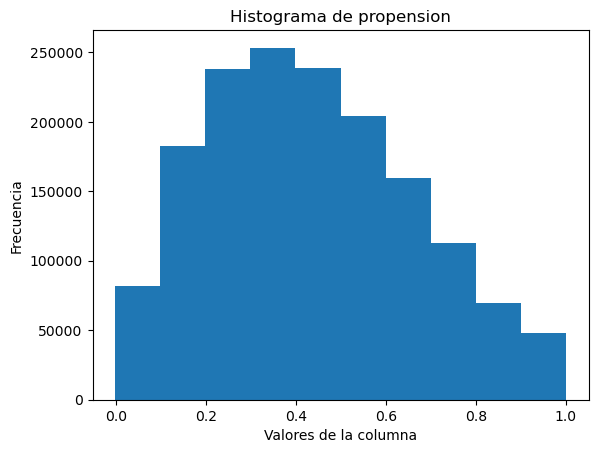

In [152]:
"""ejercicio 2.4.5.2 Histograma"""
import matplotlib.pyplot as plt



plt.hist(df2_4["propension"])


plt.xlabel("Valores de la columna")
plt.ylabel("Frecuencia")
plt.title("Histograma de propension")

plt.show()

In [127]:
"""ejercicio 2.4.5.3 propension entre0.95 y 1.05"""
df2_4[(df2_4["propension"]>=0.95) & (df2_4["propension"]<=1.05)].idcliente.count()

26629

In [140]:
k005=0
k010=0
k012=0
k015=0

In [163]:
"""ejercicio 2.4.5.4 Cuantos valores a afectado cada valor k"""
df2_4["k"]=0
def k(limite):
    k=0
    if limite>=0 and limite<1500:
        k=0.5
    elif limite>=1500 and limite<5000:
        k=1
    elif limite>=5000 and limite<10000:
        k=1.2
    elif limite>=10000:
        k=1.5
    return k
df2_4["k"]=df2_4[["limite"]].apply(lambda x: k(*x),axis=1)
print(df2_4.k.value_counts())
df2_4=df2_4.drop(columns=['k'])   

0.5    1004422
1.0     566838
1.2      17638
1.5        114
Name: k, dtype: int64


In [155]:
"""ejercicio 2.4.5.5 """
df2_4["riesgo"]=0
def riesgo(propension,pct_uso):
    riesgo="0"
    if propension>pct_uso:
        riesgo="Alto riesgo"
    else:
        riesgo="Bajo riesgo"       
    return riesgo
df2_4["riesgo"]=df2_4[["propension","pct_uso"]].apply(lambda x: riesgo(*x),axis=1)

In [164]:
df2_4

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gtr,propension,riesgo
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,C,0.889455,Alto riesgo
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,C,0.847981,Alto riesgo
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,D,0.408204,Alto riesgo
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,A,0.679201,Alto riesgo
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,D,0.519838,Alto riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75,contactado,0.668500,C,0.131454,Bajo riesgo
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25,ausente,0.224142,C,0.618435,Alto riesgo
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25,contactado,0.226518,D,0.614947,Alto riesgo
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75,contactado,0.525600,F,0.249322,Bajo riesgo


In [167]:
"""ejercicio 2.4.5.6 Prioridad"""

df2_4[df2_4["pct_uso"]>1.05]

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gtr,propension,riesgo
27344,27344,13114771,302086280523,700.0,767.82,0.0,2,1,B,10.25,contactado,1.096886,A,-0.001567,Bajo riesgo
54530,54530,13086785,634163573792,700.0,756.15,0.0,1,1,B,10.25,ausente,1.080214,A,-0.001543,Bajo riesgo
79965,79965,13213785,544227118447,1000.0,1104.82,0.0,2,1,A,18.75,contactado,1.104820,C,-0.001105,Bajo riesgo
93184,93184,12675623,918376427857,500.0,538.76,0.0,1,1,B,10.25,ausente,1.077520,A,-0.002155,Bajo riesgo
123436,123436,12399317,487422857250,2300.0,2489.25,0.0,1,1,A,18.75,ausente,1.082283,E,-0.000471,Bajo riesgo
158894,158894,12663583,862035663398,1700.0,1882.50,0.0,2,1,B,10.25,contactado,1.107353,D,-0.000651,Bajo riesgo
175442,175442,13290572,870667020438,600.0,630.98,0.0,2,1,B,10.25,contactado,1.051633,A,-0.001753,Bajo riesgo
218700,218700,12789238,247087319525,2000.0,2122.45,0.0,2,1,A,18.75,contactado,1.061225,E,-0.000531,Bajo riesgo
240160,240160,12801243,950269087463,1000.0,1052.86,0.0,2,1,B,10.25,contactado,1.052860,C,-0.001053,Bajo riesgo
251658,251658,12354749,534656243186,500.0,538.39,0.0,2,1,B,10.25,contactado,1.076780,A,-0.002154,Bajo riesgo


In [162]:
"""ejercicio 2.4.5.7 Cuantos valores a afectado cada valor k"""
importe_recaudado=(df2_4[df2_4["riesgo"]=="Alto riesgo"]["disponible"].sum())*0.015
importe_bonificado=(df2_4[df2_4["riesgo"]=="Bajo riesgo"]["disponible"].sum())*0.0043
print("El importe total recaudado por la empresa es: "+str(importe_recaudado))
print("El importe total bonificado por la empresa es: "+str(importe_bonificado))
"Los beneficios para la empresa son de :"+str(round(importe_recaudado-importe_bonificado,2))

El importe total recaudado por la empresa es: 14304343.633799994
El importe total bonificado por la empresa es: 2179379.8170369994


'Los beneficios para la empresa son de :12124963.82'

### Ejercicio 2.5

La empresa se está planteando transformar ciertas tarjetas en préstamos. Para cuando los clientes lo soliciten será necesario disponer del cuadro de amortización resultante de realizar esta transformación. Para ello es necesario lo siguiente:
* El importe del préstamo será el saldo dispuesto de la tarjeta +10% de comisión +5% del límite si la tarjeta no está sobredispuesta en este porcentaje.
* Se considerará un tipo de interés fijo del 2,75%, aunque debe poder elegirse otro.
* El plazo amortización será preestablecido en 5 años, pero podría modificarse.
* Se considera sistema de amortización francés (cuota fija) para amortización mensual.

Con todo esto:
1. Se debe programar una función que genere un dataframe con el cuadro de amortización mensual dada la información anterior y la información de la tarjeta.
2. Con las condiciones prefijadas de antemano ¿cuál sería la cuota inicial que se pagaría por cada tarjeta?
3. Esta operación solo sería aprobada si la cuota resultante supone un importe inferior al límite de la tarjeta dividido entre 55 ¿qué porcentaje de tarjetas es susceptible de ser aprobado?


In [273]:
"""Ejercicio 2.5.1 Cuadro de amortizacion funcion"""

def amortizacion(dispuesto,limite,tipo_interes,pct_uso,años):
    cap_pendiente=[]
    amort=[]
    intereses=[]
    cap_amort=[]
    mes=[]
    cuota_mes=[]
    importeprestamo=dispuesto+(dispuesto*0.10)
    if pct_uso>1.05:
        importeprestamo=importeprestamo+(limite*0.05)
    mensualidad=(años*12)
    cuota_mensual=(importeprestamo*tipo_interes)/(1-(1/((1+tipo_interes)**mensualidad)))
    
    capitalpendiente=importeprestamo
    amortizacion=0
    intereses1=0
    capamort=0
    for i in range(mensualidad+1):
        if i==0:
            cap_pendiente.append(capitalpendiente)
            amort.append(0)
            intereses.append(0)
            cap_amort.append(0)
            mes.append(0)
            cuota_mes.append(0)
        else:
            intereses.append(tipo_interes*capitalpendiente)
            intereses1=tipo_interes*capitalpendiente
            
            cuota_mes.append(cuota_mensual)
            mes.append(i)
            
            amort.append(cuota_mensual-intereses1)
            amortizacion=cuota_mensual-intereses1
            
            cap_pendiente.append(round(capitalpendiente-amortizacion,2))
            capitalpendiente=capitalpendiente-amortizacion
            
            capamort=capamort+amortizacion
            cap_amort.append(capamort)
    diccionario_amort= {'Mes': mes, 'Amortizacion': amort, 'Intereses': intereses, "cuota mensual":cuota_mes,"Amortizacion acumulada":cap_amort,"Capital Pendiente":cap_pendiente}
    amortizacion_df= pd.DataFrame(diccionario_amort)
    return amortizacion_df
      
   
            

            
            
            
            
            
    

In [274]:
amortizacion(900,1000,0.0275,0.80,5)

,Mes,Amortizacion,Intereses,cuota mensual,Amortizacion acumulada,Capital Pendiente
0,0,0.000000,0.000000,0.000000,0.000000,990.00
1,1,6.652817,27.225000,33.877817,6.652817,983.35
2,2,6.835770,27.042048,33.877817,13.488587,976.51
3,3,7.023753,26.854064,33.877817,20.512340,969.49
4,4,7.216906,26.660911,33.877817,27.729247,962.27
...,...,...,...,...,...,...
56,56,29.580552,4.297266,33.877817,863.316347,126.68
57,57,30.394017,3.483800,33.877817,893.710363,96.29
58,58,31.229852,2.647965,33.877817,924.940215,65.06
59,59,32.088673,1.789144,33.877817,957.028888,32.97


In [291]:
"""Ejercicio 2.5.2 Cuota mensual"""
#La cuota inicial de cada tarjeta depende de sus datos particulares , pero se calcularia con la siguiente formula:
#cuota_mensual=(importeprestamo*tipo_interes)/(1-(1/((1+tipo_interes)**mensualidad)))
#Voy a crear una columna en el dataframe para ver como seria la cuota para cada tarjeta
def cuotamensual(dispuesto,limite,pct_uso):
    importeprestamo=dispuesto+(dispuesto*0.10)
    if pct_uso>1.05:
        importeprestamo=importeprestamo+(limite*0.05)
    mensualidad=60
    cuota_mensual=(importeprestamo*0.0275)/(1-(1/((1+0.0275)**mensualidad)))
    return cuota_mensual
df2_4["cuotamensual"]=df2_4[["dispuesto","limite","pct_uso"]].apply(lambda x: cuotamensual(*x),axis=1)
df2_4[["idcliente","idcontrato","cuotamensual"]]



,idcliente,idcontrato,cuotamensual
0,13208123,283921503774,2.022129
1,13001708,847838228331,3.438975
2,12518311,475803017773,22.823485
3,12809806,706975222824,3.470971
4,12948369,216147508550,18.738574
...,...,...,...
1589007,13220348,533950224758,30.196428
1589008,12528552,815525413876,10.124574
1589009,13338376,417430364011,14.495189
1589010,12655633,732639882287,96.944762


In [325]:
"""Ejercicio 2.5.3"""
aprobadas=((df2_4[df2_4.cuotamensual<(df2_4.limite/55)].idcliente.count())/df2_4.idcliente.count())*100
#Aqui lo que hago es primero hacer un count de todas las que cumplen la condicion, para ello selecciono el id de cliente para que me de un numero operable y no una serie y luego hago lo mismo pero para el df sin ninguna condicion consiguiendo el 100 % de registros
print("El porcentaje de tarjetas que serian aprobadas es de un "+ str(aprobadas)+" %")


El porcentaje de tarjetas que serian aprobadas es de un 69.48053255733751 %


### Ejercicio 2.6

Cuando se utilizan técnicas estadísticas de análisis de la información a menudo es necesario que las variables que se están analizando verifiquen la hipótesis de Normalidad, esto es que su distribución de probabilidad pueda considerarse Normal. 

Sin embargo, esto no siempre se cumple, por lo que una de las posibles soluciones es transformar los datos de modo que su distribución se asemeje a la de una distribución de probabilidad Normal.

Para ello, se puede hacer uso de la familia de transformaciones de Box - Cox, que se define de la siguiente forma:
$$y^{(\lambda)}=\left\{
\begin{array}{ll}
\dfrac{(y+m)^\lambda-1}{\lambda} & \lambda \neq 0\\
\ln(y+m) & \lambda = 0\\
\end{array}\right.$$
donde el parámetro $\lambda$ ha de estimarse a partir de los datos y la constante $m$ se elige de forma que $y+m$ sea siempre positiva.

Se pide:
1. Programa una función que permita aplicar la transformación de Box - Cox sobre una columna de un `dataframe` de Pandas. Selecciona un valor para $\lambda$ y utilízalo para aplicar la transformación sobre la variable `dispuesto`. Aplícale también el valor 0.982.

1. Programa una función que permita obtener el valor $\lambda$ óptimo, con una precisiónd de dos decimales, al aplicar la familia de transformaciones Box - Cox sobre la variable `dispuesto` de forma que la variable se asemeje lo máximo posible a una distribución Normal. 

  Como criterio de Normalidad utiliza el estadístico de Jarque - Bera, de forma que cuanto menor sea, más próximo a la Normalidad se encontrará la variable.
  
  Para el cálculo del estadístico de Jarque - Bera haz uso de la función `jarque_bera` del paquete `scipy`
  
  ```
      from scipy.stats import jarque_bera
      x = np.array((1, 23, 4))
      jarque_bera_test = jarque_bera(x)
      jarque_bera_test.statistic
  ```
  
  En resumen, programa una función que calcule el valor $\lambda$ óptimo con una precisión de dos decimales que proporcione el valor mínimo del estadístico de Jarque - Bera.
1. Dibuja conjuntamente el histograma de la varible transformada y la variable sin transformar.
  

In [330]:
"""Ejercicio 2.6 Creacion de funcion BOX COX"""
def BoxCox(dframe,m,col,lambd):
    x=dframe[col]
    if lambd==0:
        y=np.log (x + m)
        df2_4["Box-Cox"]= y 
    else:
        y = (((x + m)**lambd)-1)/lambd
        df2_4["Box-Cox"] = y

In [334]:
BoxCox(df2_4,3,"dispuesto",0.982)


In [347]:
""" Creacion de funcion BOX COX Optimizada"""
def BoxCox_optimo(dframe,m,col,lambd):
    x=dframe[col]
    if lambd==0:
        y=np.log (x + m)
        df2_4["Box-Cox_optimizado"]= y 
    else:
        y = (((x + m)**lambd)-1)/lambd
        df2_4["Box-Cox_optimizado"] = y

In [348]:
BoxCox_optimo(df2_4,3,"dispuesto",0.33)

In [349]:
df2_4

,Unnamed: 0,idcliente,idcontrato,limite,dispuesto,disponible,contacto_cliente,impago,producto,tipo,contacto_str,pct_uso,limite_gtr,propension,riesgo,cuotamensual,Box-Cox,Optimo,Box-Cox_optimizado
0,0,13208123,283921503774,900.0,53.72,848.83,2,2,A,18.75,contactado,0.059689,C,0.889455,Alto riesgo,2.022129,52.691958,0.33,8.457025
1,1,13001708,847838228331,1100.0,91.36,1012.99,2,2,B,10.25,contactado,0.083055,C,0.847981,Alto riesgo,3.438975,87.519783,0.33,10.558027
2,2,12518311,475803017773,1600.0,606.33,1022.55,2,2,A,18.75,contactado,0.378956,D,0.408204,Alto riesgo,22.823485,551.839834,0.33,22.116768
3,3,12809806,706975222824,500.0,92.21,412.18,1,3,B,10.25,ausente,0.184420,A,0.679201,Alto riesgo,3.470971,88.302920,0.33,10.598299
4,4,12948369,216147508550,1700.0,497.81,1225.90,2,3,B,10.25,contactado,0.292829,D,0.519838,Alto riesgo,18.738574,454.984345,0.33,20.540705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589007,1589007,13220348,533950224758,1200.0,802.20,436.00,2,2,A,18.75,contactado,0.668500,C,0.131454,Bajo riesgo,30.196428,725.900654,0.33,24.539541
1589008,1589008,12528552,815525413876,1200.0,268.97,943.83,1,2,B,10.25,ausente,0.224142,C,0.618435,Alto riesgo,10.124574,249.355040,0.33,16.239532
1589009,1589009,13338376,417430364011,1700.0,385.08,1333.26,2,3,B,10.25,contactado,0.226518,D,0.614947,Alto riesgo,14.495189,353.966007,0.33,18.638258
1589010,1589010,12655633,732639882287,4900.0,2575.44,2447.20,2,2,A,18.75,contactado,0.525600,F,0.249322,Bajo riesgo,96.944762,2278.489643,0.33,37.449080


In [345]:
"""Funcion para lamda optimo"""
from scipy.stats import jarque_bera
def loptimo(df, column):
    x= df [column]
    m = min(x)
    formula = 0
    lamb= 0
    mjb = float('inf')
    for lambd in np.arange (-2, 2, 0.01):
        if lambd == 0:
            formula = np.log(x + m)
        else:
            formula =(((x + m) **lambd)-1)/lambd
        jarq=jarque_bera(formula)[0]
        if jarq < mjb:
            lamb = lambd
            mjb =jarq
    return round (lamb, 2) 


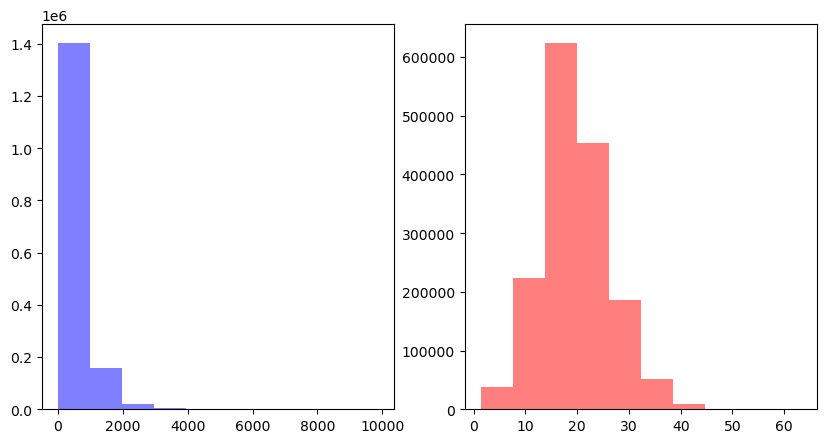

In [356]:
"""Comparacion de histogramas"""
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df2_4['Box-Cox'], bins=10, color='blue', alpha=0.5)
ax2.hist(df2_4['Box-Cox_optimizado'], bins=10, color='red', alpha=0.5)
plt.show()